In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import cv2
import csv

In [2]:
bgr_array = cv2.imread('IMG_LEARN.jpg')
sea = pd.read_csv('./sea.csv', header = None)
land = pd.read_csv('./land.csv', header = None)
sea = sea.values
land = land.values
bgr = []
for i in range(500):
    bgr.append(np.append(bgr_array[sea[i][1], sea[i][0], :], 1))

for i in range(500):
    bgr.append(np.append(bgr_array[land[i][1], land[i][0], :], 2))

with open('bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)

In [3]:
bgr_array = cv2.imread('IMG_TEST.jpg')
answer = pd.read_csv('./answer.csv', header = None)
answer = answer.values
bgr = []
for i in range(5):
    bgr.append(np.append(bgr_array[answer[i][1], answer[i][0], :], 1))
for i in range(5,15):
    bgr.append(np.append(bgr_array[answer[i][1], answer[i][0], :], 2))

with open('answer_bgr.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerows(bgr)

In [4]:
data = pd.read_csv('./bgr.csv', header = None)
test = pd.read_csv('./answer_bgr.csv', header = None)
data = data.values
test = test.values
X_data = data[:,:-1]
y_data = data[:,-1]
X_test = test[:,:-1]
y_test = test[:,-1]
sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)

predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]

# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.968
Accuracy on test set: 0.732
Max on training set: 1.000


In [5]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [5]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.928
Accuracy on test set: 0.707
Max on training set: 1.000


In [6]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [3]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

/home/yattinda/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/yattinda/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy on training set: 0.753
Accuracy on test set: 0.617
Max on training set: 0.933


/home/yattinda/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10, 10]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.989
Accuracy on test set: 0.737
Max on training set: 1.000


In [8]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(50):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [7]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/50))
print("Accuracy on test set: {:.3f}".format(sum_test/50))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.978
Accuracy on test set: 0.732
Max on training set: 0.933


In [9]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(10):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [100]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/10))
print("Accuracy on test set: {:.3f}".format(sum_test/10))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.999
Accuracy on test set: 0.787
Max on training set: 1.000


In [10]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(10):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [100, 100]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/10))
print("Accuracy on test set: {:.3f}".format(sum_test/10))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.998
Accuracy on test set: 0.733
Max on training set: 0.933


In [11]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(10):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [5, 5]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/10))
print("Accuracy on test set: {:.3f}".format(sum_test/10))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.799
Accuracy on test set: 0.667
Max on training set: 0.933


In [12]:
sum_train = 0
sum_test = 0
max_test = 0

for i in range(10):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [10, 10, 10]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    predict_sea = predict[0:5]
    predict_land = predict[5:]
    if max_test < mlp.score(X_test, y_test):
        max_test = mlp.score(X_test, y_test)
    sum_train += mlp.score(X_data, y_data)
    sum_test += mlp.score(X_test, y_test)
    
predict = mlp.predict(X_test)
predict_sea = predict[0:5]
predict_land = predict[5:]
# print("予測結果 \n sea:{} \n land:{}".format(predict_sea, predict_land))
print("Accuracy on training set: {:.3f}".format(sum_train/10))
print("Accuracy on test set: {:.3f}".format(sum_test/10))
print("Max on training set: {:.3f}".format(max_test))
# print("F1 score: {:.4f}".format(f1_score(y_test, predict)))

Accuracy on training set: 0.999
Accuracy on test set: 0.720
Max on training set: 0.933


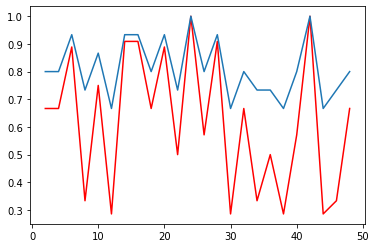

In [13]:
x = []
y_f1_1 = []
y_score_1 = []
for i in range(2, 50, 2):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x.append(i)
    y_f1_1.append(f1_score(y_test, predict))
    y_score_1.append(mlp.score(X_test, y_test))

plt.plot(x, y_f1_1, color = "red")
plt.plot(x, y_score_1)

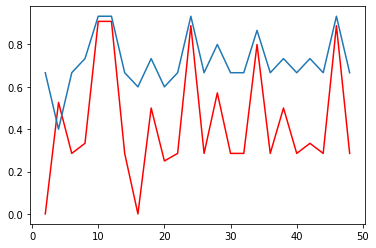

In [14]:
x_2 = []
y_f1_2 = []
y_score_2 = []
for i in range(2, 50, 2):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_2.append(i)
    y_f1_2.append(f1_score(y_test, predict))
    y_score_2.append(mlp.score(X_test, y_test))

plt.plot(x_2, y_f1_2, color = "red")
plt.plot(x_2, y_score_2)

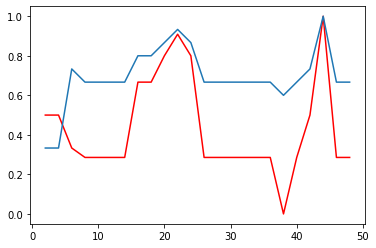

In [15]:
x_3 = []
y_f1_3 = []
y_score_3 = []
for i in range(2, 50, 2):
    mlp = MLPClassifier(solver = "lbfgs",  max_iter = 500, hidden_layer_sizes = [i, i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_3.append(i)
    y_f1_3.append(f1_score(y_test, predict))
    y_score_3.append(mlp.score(X_test, y_test))

plt.plot(x_3, y_f1_3, color = "red")
plt.plot(x_3, y_score_3)

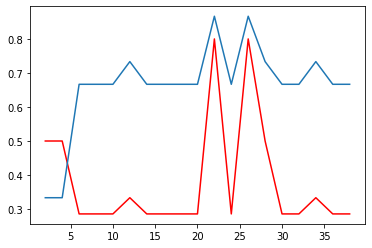

In [16]:
x_4 = []
y_f1_4 = []
y_score_4 = []
for i in range(2, 40, 2):
    mlp = MLPClassifier(solver = "lbfgs", max_iter = 500, hidden_layer_sizes = [i, i, i, i]).fit(X_data, y_data)
    predict = mlp.predict(X_test)
    x_4.append(i)
    y_f1_4.append(f1_score(y_test, predict))
    y_score_4.append(mlp.score(X_test, y_test))

plt.plot(x_4, y_f1_4, color = "red")
plt.plot(x_4, y_score_4)

In [17]:
test = pd.read_csv('./answer_bgr.csv', header = None)
test = test.values

B = test[:,0]
G = test[:,1]
R = test[:,2]

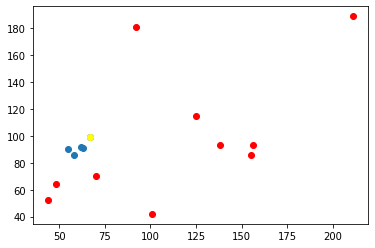

In [18]:
B_0 = B[:5]
B_1 = B[5:]
R_0 = R[:5]
R_1 = R[5:]
plt.scatter(R_0,B_0)
plt.scatter(R_1,B_1, c="red")
plt.scatter(R_0[1],B_0[1], c="yellow")

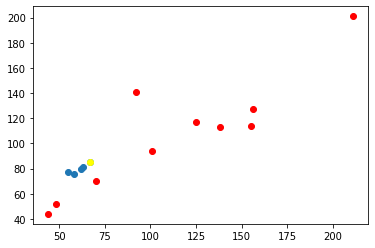

In [19]:
G_0 = G[:5]
G_1 = G[5:]
R_0 = R[:5]
R_1 = R[5:]
plt.scatter(R_0,G_0)
plt.scatter(R_1,G_1, c="red")
plt.scatter(R_0[1],G_0[1], c="yellow")

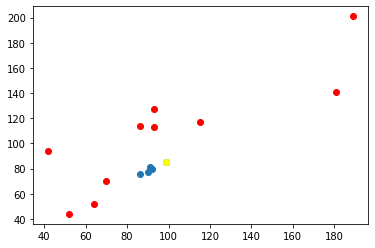

In [20]:
G_0 = G[:5]
G_1 = G[5:]
B_0 = B[:5]
B_1 = B[5:]
plt.scatter(B_0,G_0)
plt.scatter(B_1,G_1, c="red")
plt.scatter(B_0[1],G_0[1], c="yellow")

In [21]:
train = pd.read_csv('./bgr.csv', header = None)
train = train.values

B = train[:,0]
G = train[:,1]
R = train[:,2]

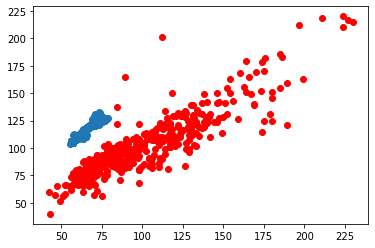

In [22]:
B_0 = B[:500]
B_1 = B[500:]
R_0 = R[:500]
R_1 = R[500:]
plt.scatter(R_0,B_0)
plt.scatter(R_1,B_1, c="red")

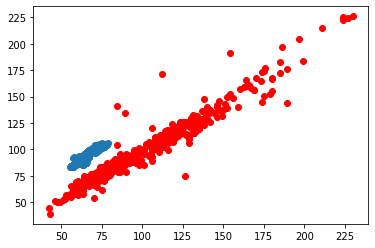

In [23]:
G_0 = G[:500]
G_1 = G[500:]
R_0 = R[:500]
R_1 = R[500:]
plt.scatter(R_0,G_0)
plt.scatter(R_1,G_1, c="red")

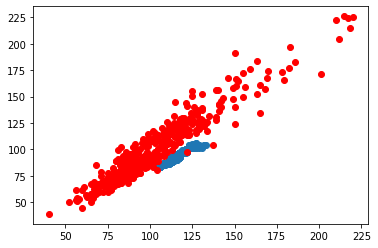

In [24]:
G_0 = G[:500]
G_1 = G[500:]
B_0 = B[:500]
B_1 = B[500:]
plt.scatter(B_0,G_0)
plt.scatter(B_1,G_1, c="red")